In [ ]:
import pandas as pd
import random
import numpy as np
from ucimlrepo import fetch_ucirepo 

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import partial_dependence, PartialDependenceDisplay, permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod

import matplotlib.pyplot as plt

In [6]:
bikes = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
# Make an explicit copy to avoid "SettingWithCopyWarning" from pandas
X, y = bikes.data.copy(), bikes.target

# We use only a subset of the data to speed up the example.
X = X.iloc[::5, :].drop(["weather","season","holiday","workingday"], axis=1)
y = y[::5]

c:\Users\roulB\Desktop\cours_iae\.my_test_env\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Train model

In [19]:

# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 


In [33]:
rf = RandomForestRegressor()

X_train = X.drop('dteday', axis=1)
columns_names = X_train.columns

In [35]:
rf.fit(X_train, y)

c:\Users\roulB\Desktop\cours_iae\.my_test_env\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

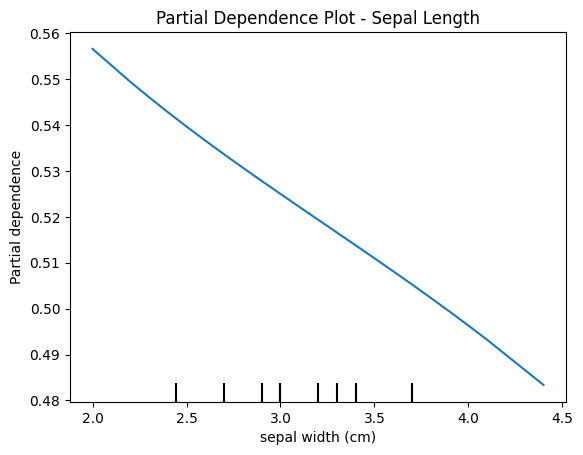

In [1]:
# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data  # Les caractéristiques
y = iris.target  # Les étiquettes

# On se concentre sur deux classes pour une régression logistique binaire
X_binary = X[y != 2]
y_binary = y[y != 2]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Affichage des PDP pour une caractéristique (par exemple, la première : 'sepal length (cm)')
features = [1]  # Index de la caractéristique
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names)
plt.title("Partial Dependence Plot - Sepal Length")
plt.show()


In [ ]:
features

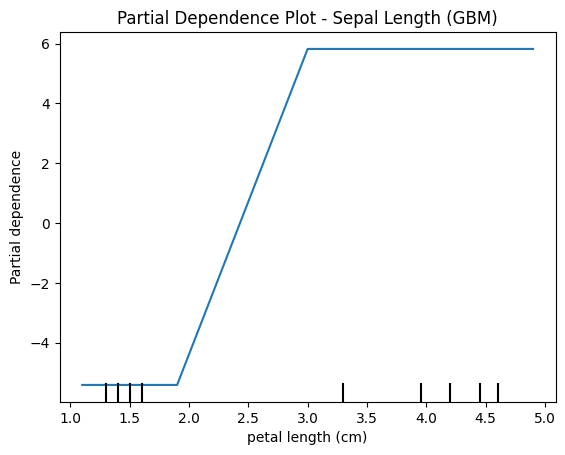

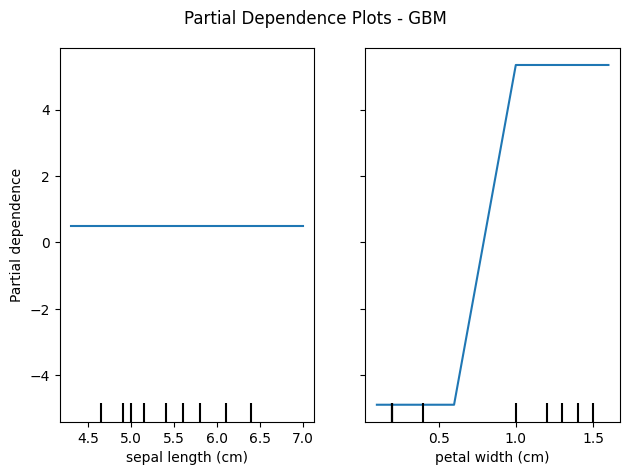

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Chargement du jeu de données Iris
iris = load_iris()
X = iris.data  # Les caractéristiques
y = iris.target  # Les étiquettes

# On se concentre sur deux classes pour une régression logistique binaire
X_binary = X[y != 2]
y_binary = y[y != 2]

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Modèle GBM (Gradient Boosting Machine)
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Affichage des PDP pour une caractéristique (par exemple, 'sepal length (cm)')
features = [2]  # Index de la caractéristique
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names, grid_resolution=50)
plt.title("Partial Dependence Plot - Sepal Length (GBM)")
plt.show()

# PDP pour plusieurs caractéristiques (par exemple, 'sepal length' et 'petal width')
features = [0, 3]  # Index des caractéristiques
PartialDependenceDisplay.from_estimator(model, X_train, features, feature_names=iris.feature_names, grid_resolution=50)
plt.suptitle("Partial Dependence Plots - GBM")
plt.tight_layout()
plt.show()


## Partial dependence plot

In [50]:
# PDP pour plusieurs caractéristiques (par exemple, 'sepal length' et 'petal width')
features = [0, 1,2,3]  # Index des caractéristiques
PartialDependenceDisplay.from_estimator(rf, 
                                         X_train, 
                                         features,
                                         categorical_features="yr" ,
                                         feature_names=columns_names, 
                                         grid_resolution=50)
plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.show()


TypeError: iteration over a 0-d array

### Feature interaction with friedman statistic

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR


bikes = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
# Make an explicit copy to avoid "SettingWithCopyWarning" from pandas
X, y = bikes.data.copy(), bikes.target

# We use only a subset of the data to speed up the example.
X = X.iloc[::5, :]
y = y[::5]

c:\Users\roulB\Desktop\cours_iae\.my_test_env\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [29]:
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0,1,0,False,6,False,clear,9.84,14.395,0.81,0.0000
5,spring,0,1,5,False,6,False,misty,9.84,12.880,0.75,6.0032
10,spring,0,1,10,False,6,False,clear,15.58,19.695,0.76,16.9979
15,spring,0,1,15,False,6,False,misty,18.04,21.970,0.77,19.9995
20,spring,0,1,20,False,6,False,misty,16.40,20.455,0.87,16.9979
...,...,...,...,...,...,...,...,...,...,...,...,...
17355,spring,1,12,0,False,1,True,clear,7.38,9.090,0.55,12.9980
17360,spring,1,12,5,False,1,True,clear,6.56,7.575,0.64,12.9980
17365,spring,1,12,10,False,1,True,misty,8.20,10.605,0.69,8.9981
17370,spring,1,12,15,False,1,True,misty,11.48,14.395,0.45,8.9981


In [8]:
categorical_features = X.select_dtypes(include=['category']).columns

In [9]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [89]:
# Création du pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0, min_samples_leaf=10, max_depth=3,min_samples_split=5,criterion="squared_error"))
])

In [90]:
model = pipeline.fit(X, y)

In [36]:
random.seed(8)
X_exp = random.choices(X_train.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=columns_names)

In [37]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(rf, X_exp, batchsize=50)

TypeError: Visualizer.plot_interaction_graph() missing 2 required positional arguments: 'ovo' and 'feature_importance'

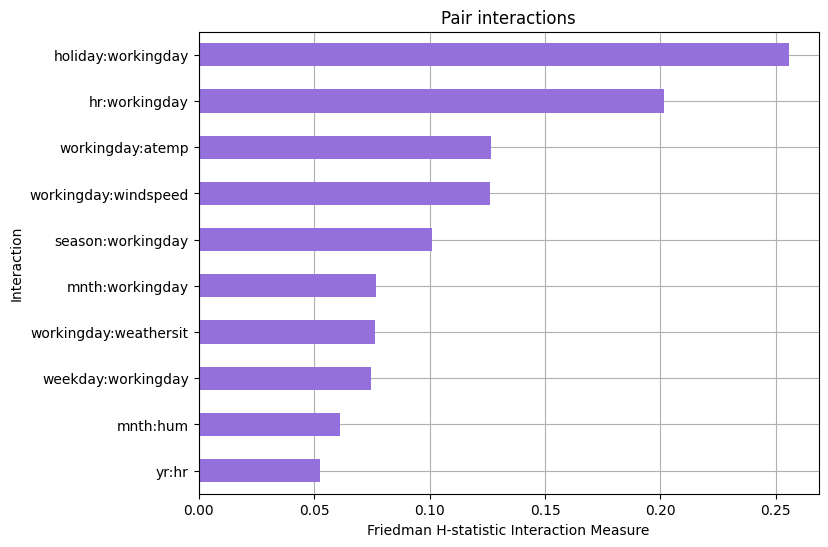

In [39]:
h_stat.plot(vis_type="bar_chart",top_k=10 )

## Feature permutation importance

In [44]:
r = permutation_importance(rf, X_train, y,
                           n_repeats=10,
                           random_state=0
                           )


count    3476.000000
mean      189.932394
std       181.527194
min         1.000000
25%        38.750000
50%       144.000000
75%       282.000000
max       968.000000
Name: count, dtype: float64

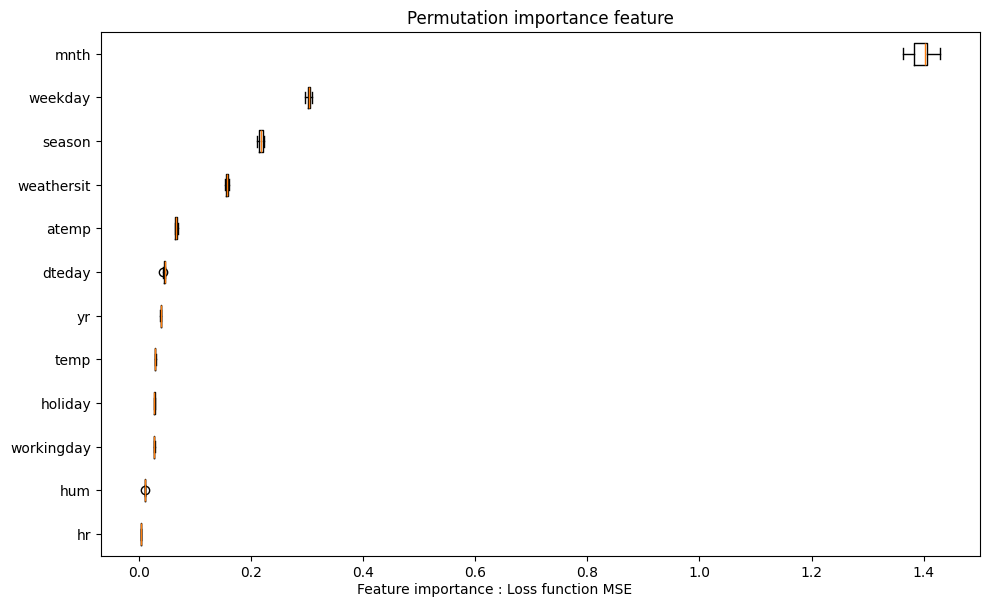

In [45]:
result = r
perm_sorted_idx = result.importances_mean.argsort()

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
ax1.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx]
)
plt.title('Permutation importance feature')
fig.text(.5, .001, "Feature importance : Loss function MSE", ha='center')

fig.tight_layout()
plt.show()

In [97]:
# Création du pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearSVR())
])

In [99]:
svr_model = pipeline.fit(X,y)

c:\Users\roulB\Desktop\cours_iae\.my_test_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [101]:
r = permutation_importance(svr_model, X, y,
                           n_repeats=30,
                           random_state=0
                           )

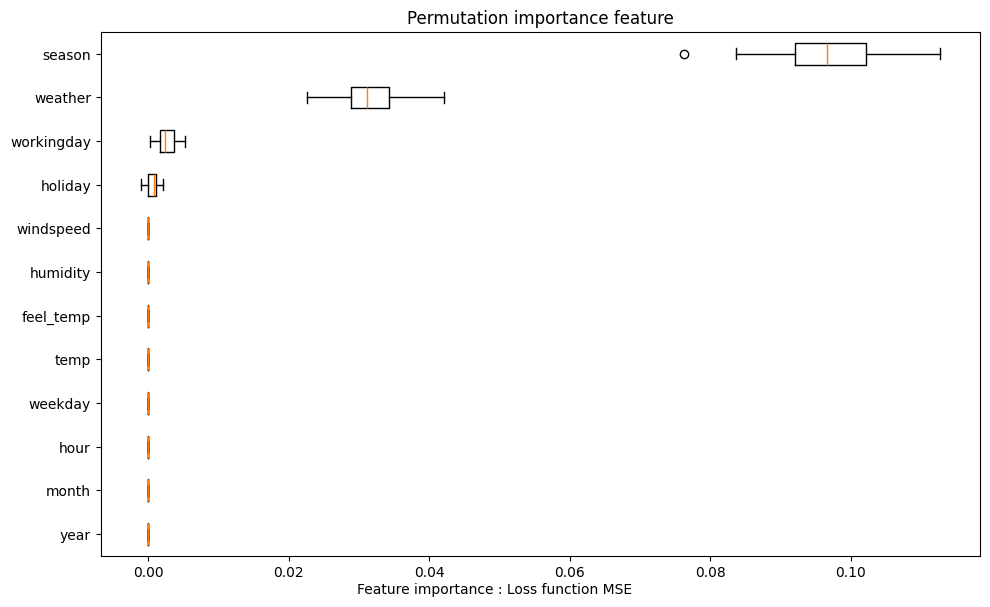

In [104]:
result = r
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(model.steps[1][1].feature_importances_)
tree_indices = np.arange(0, len(model.steps[1][1].feature_importances_)) + 0.5

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
ax1.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X.columns[perm_sorted_idx]
)
plt.title('Permutation importance feature')
fig.text(.5, .001, "Feature importance : Loss function MSE", ha='center')

fig.tight_layout()
plt.show()